# A simple static-size population model of Wright-Fisher for educational purposes.

## Lesson Two: Replication
We will replicate the population from lesson one, without selecting against fitness (no natural selection, only random selection of each element from population).</b>
A new way of deriving fitness effects that reflects the natural effects of mutations better than the previous simulation is also added:

In [1]:
import copy as cp
import numpy as np
import matplotlib.pyplot as plt
for i in (cp, np, plt):
    print (i , "was imported successfuly.")

<module 'copy' from '/home/art/miniconda3/lib/python3.7/copy.py'> was imported successfuly.
<module 'numpy' from '/home/art/miniconda3/lib/python3.7/site-packages/numpy/__init__.py'> was imported successfuly.
<module 'matplotlib.pyplot' from '/home/art/miniconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'> was imported successfuly.


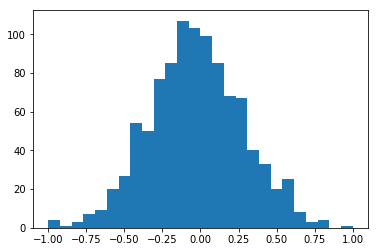

In [2]:
# In this simulation, the fitness effect is derived from a distribution plotted by running this cell. Each distribution is used
# for testing different mutational load.
Natural = np.random.exponential(scale=1, size=1000)
Highfit = np.random.normal(scale=1, size=1000)
Lowfit = np.random.poisson(size=1000)
mut_effect = np.interp(Highfit, (Highfit.min(), Highfit.max()), (-1, 1))
# mut_effect = np.interp(Natural, (Natural.min(), Natural.max()), (-1, 1))
# mut_effect = np.interp(Lowfit, (Lowfit.min(), Lowfit.max()), (-1, 1))
plot=plt.hist(mut_effect, bins='auto')
# only one of the mut_effects can be active, depending on the problem you are facing, we provided three.

This simulation needs one more variable, the number of generations you would like to replicate the population (R). Note that the population size remains constant.

In [25]:
U = 0.001
N = 2
R = 3
w_init = 1
Pop_init = []

The next function mutates initial fitness (1 in the default case), depending on number of mutations in
one generation, if no mutation exists,
it returns current fitness (not the initial one), if there are mutations, a fitness effect is drawn from
the mut_effect to determine its fitness effect,
each fitness effect is added to the current fitness, in this linear model, epistasis is not considered,
and since our elements are haplotype genomes,
mendelian inheritance is irrelevant. Since fitnesses equal or lower than 0 are either dead or sterile,
they are not mutated so that no dead element is revived.

In [26]:
init_flag = False
# The next function derives mutation frequency depending on the mutation rate from a poisson distribution, why poisson?, lambda = U or size = U?
# L site and N mutations, selecting N site in L is same as poisson distribution.
def get_mut_num():
    return np.random.poisson(U)

def mutate():
    w = w_init
    mut_num = get_mut_num()
    if mut_num > 0 and w > 0:
        for i in range(mut_num):
            s = np.random.choice(mut_effect)
            if s == -1.:
                w = 0.0
            else:
                w += s
        return w
    else:
        return w
        
def get_next_gen():
    if init_flag == False:
        Population = Pop_init
        for i in range (N):
            Population.append(mutate())
        print (Population)
        init_flag == True
        current_gen_parents = cp.deepcopy(Population)
    else:
        Population = []
        for i in current_gen_parents:
            Population.append(mutate(i))
        print (Population)

A -1 fitness effect means a lethal mutation, so for an element with a genotype of very high fitness, the mutation causes death, this number is arbitrary.</b>
The next cell is the first part of the WrightFisher simulation for next lessons.</b>
Run this population with different ranges, and different mutation rates:

In [27]:
for j in range (R):
        get_next_gen()

[1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
